In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic EDA

In [2]:
#Importing the transactions sample data
transactions_sample = pd.read_csv("../IP2022_Spring_8451/data/transactions_sample.csv", index_col=0, parse_dates=True)
transactions_sample

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp
1,2261,309,3.162522e+10,940996,1,3.86,0.43,0.0,0.0,5,2017-01-28 14:06:53
2,2131,368,3.205313e+10,873902,1,1.59,0.90,0.0,0.0,10,2017-02-28 22:31:57
3,511,316,3.244586e+10,847901,1,1.00,0.69,0.0,0.0,13,2017-03-26 13:22:21
4,400,388,3.193224e+10,13094913,2,11.87,2.90,0.0,0.0,8,2017-02-18 13:13:10
5,918,340,3.207466e+10,1085604,1,1.29,0.00,0.0,0.0,10,2017-03-02 15:05:57
...,...,...,...,...,...,...,...,...,...,...,...
74996,1271,364,4.081309e+10,899459,1,2.99,1.00,0.0,0.0,48,2017-11-21 10:02:06
74997,1358,289,4.027926e+10,12810393,2,4.18,3.59,0.0,0.0,41,2017-10-08 17:30:24
74998,391,443,3.279465e+10,829323,1,1.74,0.00,0.0,0.0,17,2017-04-17 15:06:10
74999,339,288,3.457653e+10,13190294,1,1.58,0.00,0.0,0.0,32,2017-08-01 17:22:30


In [3]:
transactions_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 1 to 75000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   household_id           75000 non-null  int64  
 1   store_id               75000 non-null  int64  
 2   basket_id              75000 non-null  float64
 3   product_id             75000 non-null  int64  
 4   quantity               75000 non-null  int64  
 5   sales_value            75000 non-null  float64
 6   retail_disc            75000 non-null  float64
 7   coupon_disc            75000 non-null  float64
 8   coupon_match_disc      75000 non-null  float64
 9   week                   75000 non-null  int64  
 10  transaction_timestamp  75000 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 6.9+ MB


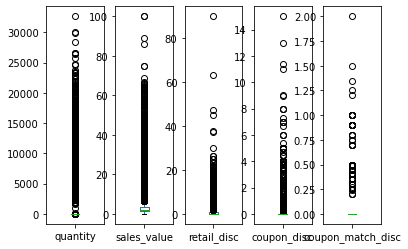

In [4]:
#box plot to check outliers and the spread of the data
transactions_sample.loc[:,["quantity","sales_value","retail_disc","coupon_disc","coupon_match_disc"]].plot(subplots=True,kind="box")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

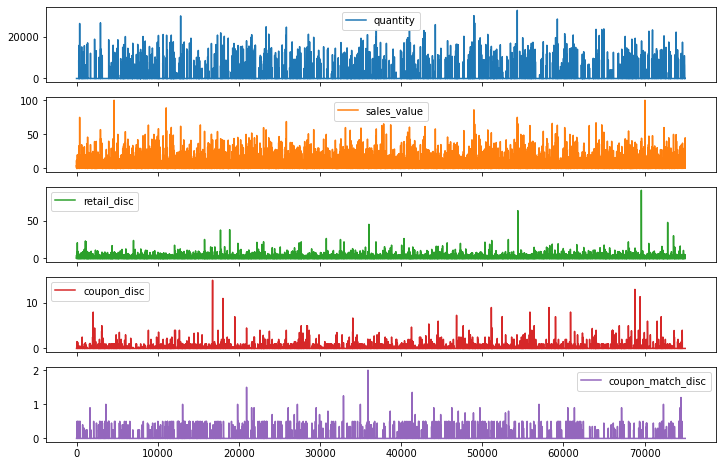

In [5]:
#line plot to check outliers and the spread of the data
transactions_sample.loc[:,["quantity","sales_value","retail_disc","coupon_disc","coupon_match_disc"]].plot(subplots=True,kind="line")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [6]:
#There are a few outliers as the minimum value for Quantity and Sales is 0. Is it possible or do we need to treat them as missing values? 
#Quantity have some outliers which can bee seen from its max value.
transactions_sample.loc[:,["quantity","sales_value","retail_disc","coupon_disc","coupon_match_disc"]].describe()

,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,103.795920,3.119137,0.535745,0.018089,0.003228
std,1173.177298,4.023211,1.244292,0.218042,0.040361
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.290000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.010000,0.000000,0.000000
75%,1.000000,3.490000,0.690000,0.000000,0.000000
max,32623.000000,100.000000,90.000000,15.000000,2.000000


In [7]:
#Importing the complete transactions data
transactions = pd.read_csv("../IP2022_Spring_8451/data/transactions.csv", index_col=0,skipfooter=1)
transactions

<ipython-input-7-fa76ae212f15>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  transactions = pd.read_csv("../IP2022_Spring_8451/data/transactions.csv", index_col=0,skipfooter=1)


,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp
1,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26
2,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28
3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30
4,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,2017-01-01 07:30:27
5,906,319,3.119871e+10,1053875.0,2,2.78,0.80,0.0,0.0,1,2017-01-01 07:30:27
...,...,...,...,...,...,...,...,...,...,...,...
1469302,679,447,4.145310e+10,1071713.0,2,6.98,0.40,0.0,0.0,53,2017-12-31 22:50:03
1469303,679,447,4.145310e+10,14025548.0,1,0.79,0.20,0.0,0.0,53,2017-12-31 22:50:03
1469304,2070,311,4.145308e+10,909894.0,1,1.73,0.17,0.0,0.0,53,2017-12-31 23:01:20
1469305,2070,311,4.145308e+10,933067.0,2,5.00,2.98,0.0,0.0,53,2017-12-31 23:01:20


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469306 entries, 1 to 1469306
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   household_id           1469306 non-null  int64  
 1   store_id               1469306 non-null  int64  
 2   basket_id              1469306 non-null  float64
 3   product_id             1469306 non-null  float64
 4   quantity               1469306 non-null  int64  
 5   sales_value            1469306 non-null  float64
 6   retail_disc            1469306 non-null  float64
 7   coupon_disc            1469306 non-null  float64
 8   coupon_match_disc      1469306 non-null  float64
 9   week                   1469306 non-null  int64  
 10  transaction_timestamp  1469306 non-null  object 
dtypes: float64(6), int64(4), object(1)
memory usage: 134.5+ MB


In [9]:
#Importing the promotions data
promotions = pd.read_csv("../IP2022_Spring_8451/data/promotions.csv", index_col=0,skipfooter=1)
promotions

<ipython-input-9-6474e5a6b535>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  promotions = pd.read_csv("../IP2022_Spring_8451/data/promotions.csv", index_col=0,skipfooter=1)


,product_id,store_id,display_location,mailer_location,week
1,1000050,316,9,0,1
2,1000050,337,3,0,1
3,1000050,441,5,0,1
4,1000092,292,0,A,1
5,1000092,293,0,A,1
...,...,...,...,...,...
735131,987871,309,6,0,2
735132,987871,412,6,0,2
735133,987871,442,6,0,2
735134,987871,445,6,0,2


In [10]:
#Looking for missing values and the datatype of each feature
promotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735135 entries, 1 to 735135
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   product_id        735135 non-null  int64 
 1   store_id          735135 non-null  int64 
 2   display_location  735135 non-null  object
 3   mailer_location   735135 non-null  object
 4   week              735135 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 33.7+ MB


In [11]:
#renaming the week column as promtion_week
promotions.columns = ['product_id', 'store_id', 'display_location', 'mailer_location','promotion_week']

In [12]:
#Identifying products with most promotions across different stores
promotions.groupby(["product_id"]).product_id.count().sort_values(ascending=False)

product_id
1045220    214
1219347    214
1562004    214
1559641    214
460165     214
          ... 
9575254      1
830156       1
2125734      1
9575213      1
1107687      1
Name: product_id, Length: 25564, dtype: int64

In [13]:
#Importing the products data
products = pd.read_csv("../IP2022_Spring_8451/data/products.csv", index_col=0)
products

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
1,25671.0,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
2,26081.0,2,MISCELLANEOUS,National,NaN,NaN,NaN
3,26093.0,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,NaN
4,26190.0,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
5,26355.0,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92327,18293142.0,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,NaN
92328,18293439.0,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,NaN
92329,18293696.0,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,NaN
92330,18294080.0,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,NaN


In [14]:
# Identifying the spread of products across multiple departments
products.groupby(["department"]).product_id.count().sort_values(ascending=False)

department
GROCERY             39023
DRUG GM             31540
PRODUCE              3117
COSMETICS            3011
NUTRITION            2914
MEAT                 2542
MEAT-PCKGD           2427
DELI                 2359
PASTRY               2149
FLORAL                938
MISCELLANEOUS         578
SEAFOOD-PCKGD         563
SPIRITS               377
SEAFOOD               369
GARDEN CENTER         128
RESTAURANT            102
SALAD BAR              48
COUPON                 39
TRAVEL & LEISURE       28
FROZEN GROCERY         23
FUEL                   16
CHEF SHOPPE            14
PHOTO & VIDEO           7
CNTRL/STORE SUP         4
POSTAL CENTER           3
TOYS                    3
CHARITABLE CONT         2
PROD-WHS SALES          2
AUTOMOTIVE              2
HOUSEWARES              1
GM MERCH EXP            1
ELECT &PLUMBING         1
Name: product_id, dtype: int64

In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92331 entries, 1 to 92331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        92331 non-null  float64
 1   manufacturer_id   92331 non-null  int64  
 2   department        92331 non-null  object 
 3   brand             92331 non-null  object 
 4   product_category  91791 non-null  object 
 5   product_type      91803 non-null  object 
 6   package_size      61745 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ MB


In [16]:
#Importing the Demographics data
demographics = pd.read_csv("../IP2022_Spring_8451/data/demographics.csv", index_col=0)
demographics

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
1,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0
3,1003,35-44,25-34K,NaN,Unmarried,1,1 Adult No Kids,0
4,1004,25-34,15-24K,NaN,Unmarried,1,1 Adult No Kids,0
5,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2
...,...,...,...,...,...,...,...,...
797,986,25-34,35-49K,NaN,Unmarried,1,1 Adult No Kids,0
798,992,45-54,35-49K,Homeowner,Married,3,2 Adults Kids,1
799,993,55-64,50-74K,Homeowner,Married,5+,1 Adult Kids,3+
800,996,55-64,25-34K,Homeowner,Married,2,2 Adults No Kids,0


In [17]:
#There are few missing values
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   household_id    801 non-null    int64 
 1   age             801 non-null    object
 2   income          801 non-null    object
 3   home_ownership  568 non-null    object
 4   marital_status  664 non-null    object
 5   household_size  801 non-null    object
 6   household_comp  801 non-null    object
 7   kids_count      801 non-null    object
dtypes: int64(1), object(7)
memory usage: 56.3+ KB


In [18]:
#Basic desciptive statistics of household data
demographics.describe(include="O")

,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
count,801,801,568,664,801,801,801
unique,6,12,4,2,5,4,4
top,45-54,50-74K,Homeowner,Married,2,2 Adults No Kids,0
freq,288,192,504,340,318,258,513


In [19]:
#Demographics by age group
demographics.age.value_counts(dropna=False)

45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: age, dtype: int64

In [20]:
#Demographics by income group
demographics.income.value_counts(dropna=False)

50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
175-199K      11
250K+         11
200-249K       5
Name: income, dtype: int64

In [21]:
#Demographics by home ownership 
demographics.home_ownership.value_counts(dropna=False)

Homeowner             504
NaN                   233
Renter                 42
Probable Homeowner     11
Probable Renter        11
Name: home_ownership, dtype: int64

In [22]:
#Demographics by marital status 
demographics.marital_status.value_counts(dropna=False)

Married      340
Unmarried    324
NaN          137
Name: marital_status, dtype: int64

In [23]:
#Demographics by hosuehold size
demographics.household_size.value_counts(dropna=False)

2     318
1     255
3     109
5+     66
4      53
Name: household_size, dtype: int64

In [24]:
#Demographics by household composition
demographics.household_comp.value_counts(dropna=False)

2 Adults No Kids    258
1 Adult No Kids     255
2 Adults Kids       195
1 Adult Kids         93
Name: household_comp, dtype: int64

In [25]:
#Demographics by number of kids
demographics.kids_count.value_counts(dropna=False)

0     513
1     159
3+     69
2      60
Name: kids_count, dtype: int64

In [26]:
#Importing the coupons data
coupons = pd.read_csv("../IP2022_Spring_8451/data/coupons.csv", index_col=0)
coupons

,coupon_upc,product_id,campaign_id
1,10000085207,9676830.0,26
2,10000085207,9676943.0,26
3,10000085207,9676944.0,26
4,10000085207,9676947.0,26
5,10000085207,9677008.0,26
...,...,...,...
116200,59986600074,10456329.0,18
116201,59986600074,10457608.0,18
116202,59986600074,12385921.0,18
116203,59986600074,6961675.0,18


In [27]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116204 entries, 1 to 116204
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   coupon_upc   116204 non-null  int64  
 1   product_id   116204 non-null  float64
 2   campaign_id  116204 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 3.5 MB


In [28]:
#Making the product id column as INT64 as other tables have it as INT64
coupons.product_id = coupons.product_id.astype(np.int64)
#coupons.drop_duplicates(keep="first",inplace=True)

In [29]:
Number_of_coupons_by_campaign = coupons.campaign_id.value_counts(dropna=False)

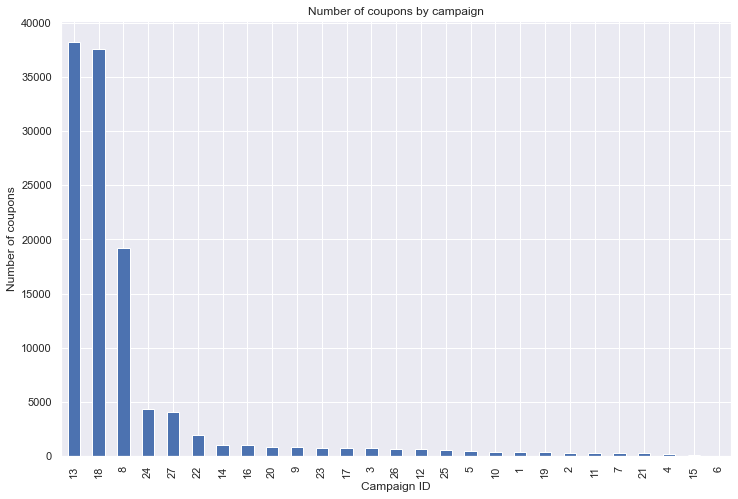

In [30]:
sns.set()
Number_of_coupons_by_campaign.plot(kind="bar")
plt.xlabel("Campaign ID")
plt.ylabel("Number of coupons")
plt.title("Number of coupons by campaign")
plt.show()

In [31]:
#Importing coupons redemption data
coupon_redemptions = pd.read_csv("../IP2022_Spring_8451/data/coupon_redemptions.csv", index_col=0)
coupon_redemptions

,household_id,coupon_upc,campaign_id,redemption_date
1,1029,51380041013,26,01-01-2017
2,1029,51380041313,26,01-01-2017
3,165,53377610033,26,03-01-2017
4,712,51380041013,26,07-01-2017
5,712,54300016033,26,07-01-2017
...,...,...,...,...
2098,807,51200000076,23,30-12-2017
2099,807,55200017313,23,30-12-2017
2100,1676,10000085491,23,30-12-2017
2101,1676,54850010033,23,30-12-2017


In [32]:
coupon_redemptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 1 to 2102
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   household_id     2102 non-null   int64 
 1   coupon_upc       2102 non-null   int64 
 2   campaign_id      2102 non-null   int64 
 3   redemption_date  2102 non-null   object
dtypes: int64(3), object(1)
memory usage: 82.1+ KB


In [33]:
coupons_redemption_by_campaign = coupon_redemptions.campaign_id.value_counts(dropna=False)

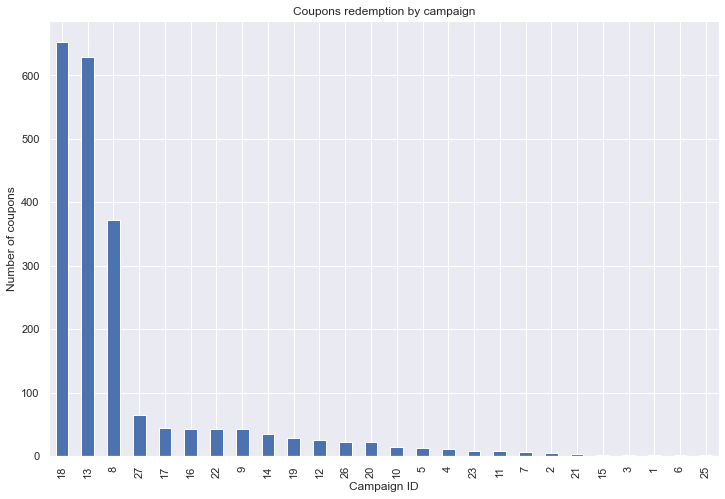

In [34]:
sns.set()
coupons_redemption_by_campaign.plot(kind="bar")
plt.xlabel("Campaign ID")
plt.ylabel("Number of coupons")
plt.title("Coupons redemption by campaign")
plt.show()

In [35]:
#Importing campaigns data
campaigns = pd.read_csv("../IP2022_Spring_8451/data/campaigns.csv", index_col=0)
campaigns

,campaign_id,household_id
1,1,105
2,1,1238
3,1,1258
4,1,1483
5,1,2200
...,...,...
6585,9,93
6586,9,941
6587,9,949
6588,9,993


In [36]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 1 to 6589
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   campaign_id   6589 non-null   int64
 1   household_id  6589 non-null   int64
dtypes: int64(2)
memory usage: 154.4 KB


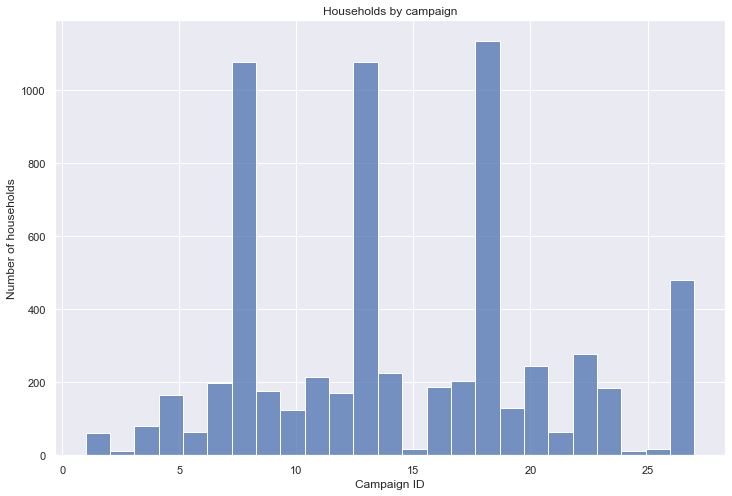

In [37]:
sns.histplot(data=campaigns,x="campaign_id")
plt.xlabel("Campaign ID")
plt.ylabel("Number of households")
plt.title("Households by campaign")
plt.show()

In [38]:
#Importing campaign description data
campaign_descriptions = pd.read_csv("../IP2022_Spring_8451/data/campaign_descriptions.csv", index_col=0)
campaign_descriptions

,campaign_id,campaign_type,start_date,end_date
1,1,Type B,2017-03-03,2017-04-09
2,2,Type B,2017-03-08,2017-04-09
3,3,Type C,2017-03-13,2017-05-08
4,4,Type B,2017-03-29,2017-04-30
5,5,Type B,2017-04-03,2017-05-07
6,6,Type C,2017-04-19,2017-05-21
7,7,Type B,2017-04-24,2017-05-28
8,8,Type A,2017-05-08,2017-06-25
9,9,Type B,2017-05-31,2017-07-02
10,10,Type B,2017-06-28,2017-07-30


In [39]:
campaign_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    27 non-null     int64 
 1   campaign_type  27 non-null     object
 2   start_date     27 non-null     object
 3   end_date       27 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [40]:
campaign_descriptions.campaign_type.value_counts(dropna=False)

Type B    17
Type C     6
Type A     4
Name: campaign_type, dtype: int64

Text(0.5, 1.0, 'Campaign Types')

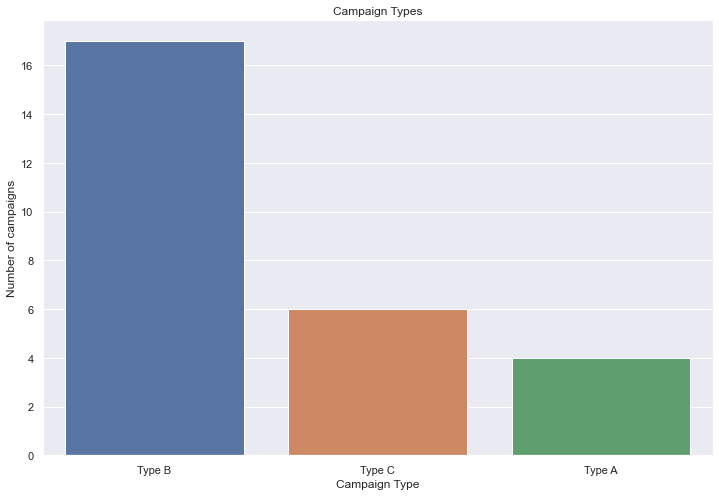

In [41]:
sns.countplot(x="campaign_type",data=campaign_descriptions)
plt.xlabel("Campaign Type")
plt.ylabel("Number of campaigns")
plt.title("Campaign Types")

# Merging all CSV Files

In [42]:
#Merging transactions table with the products table using product_id to get product informations
transactions_products= pd.merge(transactions,products,on="product_id",how="left")
transactions_products

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,manufacturer_id,department,brand,product_category,product_type,package_size
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28,69.0,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,69.0,GROCERY,Private,BAG SNACKS,POTATO CHIPS,11.5 OZ
3,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,2017-01-01 07:30:27,2142.0,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BAGELS,17.1 OZ
4,906,319,3.119871e+10,1053875.0,2,2.78,0.80,0.0,0.0,1,2017-01-01 07:30:27,2326.0,GROCERY,National,SEAFOOD - SHELF STABLE,TUNA,5.0 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469301,679,447,4.145310e+10,1071713.0,2,6.98,0.40,0.0,0.0,53,2017-12-31 22:50:03,988.0,GROCERY,National,FROZEN PIZZA,SNACKS/APPETIZERS,10 OZ
1469302,679,447,4.145310e+10,14025548.0,1,0.79,0.20,0.0,0.0,53,2017-12-31 22:50:03,693.0,DRUG GM,National,CANDY - PACKAGED,CHEWING GUM,.81 OZ
1469303,2070,311,4.145308e+10,909894.0,1,1.73,0.17,0.0,0.0,53,2017-12-31 23:01:20,69.0,GROCERY,Private,REFRGRATD JUICES/DRNKS,DAIRY CASE 100% PURE JUICE - O,NaN
1469304,2070,311,4.145308e+10,933067.0,2,5.00,2.98,0.0,0.0,53,2017-12-31 23:01:20,1425.0,MEAT-PCKGD,National,BACON,FLAVORED/OTHER,16 OZ


In [43]:
transactions_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469306 entries, 0 to 1469305
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   household_id           1469306 non-null  int64  
 1   store_id               1469306 non-null  int64  
 2   basket_id              1469306 non-null  float64
 3   product_id             1469306 non-null  float64
 4   quantity               1469306 non-null  int64  
 5   sales_value            1469306 non-null  float64
 6   retail_disc            1469306 non-null  float64
 7   coupon_disc            1469306 non-null  float64
 8   coupon_match_disc      1469306 non-null  float64
 9   week                   1469306 non-null  int64  
 10  transaction_timestamp  1469306 non-null  object 
 11  manufacturer_id        1464470 non-null  float64
 12  department             1464470 non-null  object 
 13  brand                  1464470 non-null  object 
 14  product_category  

In [44]:
#Merging transactions_products table with promotions table on product_id and store_id to get the store specific product promo infomation
temp_df= pd.merge(transactions_products,promotions,on=["product_id","store_id"],how="left")
temp_df

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,manufacturer_id,department,brand,product_category,product_type,package_size,display_location,mailer_location,promotion_week
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,NaN,NaN,NaN
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,2017-01-01 07:10:28,69.0,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT,NaN,NaN,NaN
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,69.0,GROCERY,Private,BAG SNACKS,POTATO CHIPS,11.5 OZ,9,0,1.0
3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,2017-01-01 07:26:30,69.0,GROCERY,Private,BAG SNACKS,POTATO CHIPS,11.5 OZ,9,0,2.0
4,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,2017-01-01 07:30:27,2142.0,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BAGELS,17.1 OZ,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535179,679,447,4.145310e+10,1071713.0,2,6.98,0.40,0.0,0.0,53,2017-12-31 22:50:03,988.0,GROCERY,National,FROZEN PIZZA,SNACKS/APPETIZERS,10 OZ,NaN,NaN,NaN
1535180,679,447,4.145310e+10,14025548.0,1,0.79,0.20,0.0,0.0,53,2017-12-31 22:50:03,693.0,DRUG GM,National,CANDY - PACKAGED,CHEWING GUM,.81 OZ,NaN,NaN,NaN
1535181,2070,311,4.145308e+10,909894.0,1,1.73,0.17,0.0,0.0,53,2017-12-31 23:01:20,69.0,GROCERY,Private,REFRGRATD JUICES/DRNKS,DAIRY CASE 100% PURE JUICE - O,NaN,0,D,2.0
1535182,2070,311,4.145308e+10,933067.0,2,5.00,2.98,0.0,0.0,53,2017-12-31 23:01:20,1425.0,MEAT-PCKGD,National,BACON,FLAVORED/OTHER,16 OZ,NaN,NaN,NaN


In [45]:
#Merging the resulting table with demographics data to get household information wherever possible
detailed_transactions = pd.merge(temp_df,demographics,on="household_id",how="left")
detailed_transactions

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,display_location,mailer_location,promotion_week,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,...,NaN,NaN,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,...,NaN,NaN,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,...,9,0,1.0,45-54,100-124K,NaN,Unmarried,1,1 Adult No Kids,0
3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,...,9,0,2.0,45-54,100-124K,NaN,Unmarried,1,1 Adult No Kids,0
4,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,...,NaN,NaN,NaN,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535179,679,447,4.145310e+10,1071713.0,2,6.98,0.40,0.0,0.0,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535180,679,447,4.145310e+10,14025548.0,1,0.79,0.20,0.0,0.0,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535181,2070,311,4.145308e+10,909894.0,1,1.73,0.17,0.0,0.0,53,...,0,D,2.0,45-54,50-74K,NaN,Unmarried,1,1 Adult No Kids,0
1535182,2070,311,4.145308e+10,933067.0,2,5.00,2.98,0.0,0.0,53,...,NaN,NaN,NaN,45-54,50-74K,NaN,Unmarried,1,1 Adult No Kids,0


In [46]:
detailed_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535184 entries, 0 to 1535183
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   household_id           1535184 non-null  int64  
 1   store_id               1535184 non-null  int64  
 2   basket_id              1535184 non-null  float64
 3   product_id             1535184 non-null  float64
 4   quantity               1535184 non-null  int64  
 5   sales_value            1535184 non-null  float64
 6   retail_disc            1535184 non-null  float64
 7   coupon_disc            1535184 non-null  float64
 8   coupon_match_disc      1535184 non-null  float64
 9   week                   1535184 non-null  int64  
 10  transaction_timestamp  1535184 non-null  object 
 11  manufacturer_id        1530348 non-null  float64
 12  department             1530348 non-null  object 
 13  brand                  1530348 non-null  object 
 14  product_category  

In [47]:
#Spliting the transacction timestap information into date and time features
transaction_timestamp = detailed_transactions.transaction_timestamp.str.strip().str.split(" ",expand=True)
transaction_timestamp.columns=["transaction_date","transaction_time"]
transaction_timestamp

,transaction_date,transaction_time
0,2017-01-01,06:53:26
1,2017-01-01,07:10:28
2,2017-01-01,07:26:30
3,2017-01-01,07:26:30
4,2017-01-01,07:30:27
...,...,...
1535179,2017-12-31,22:50:03
1535180,2017-12-31,22:50:03
1535181,2017-12-31,23:01:20
1535182,2017-12-31,23:01:20


In [48]:
detailed_transactions = pd.concat([detailed_transactions,transaction_timestamp],axis=1)

In [49]:
detailed_transactions

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,promotion_week,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,transaction_date,transaction_time
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,...,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,2017-01-01,06:53:26
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,...,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,2017-01-01,07:10:28
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,...,1.0,45-54,100-124K,NaN,Unmarried,1,1 Adult No Kids,0,2017-01-01,07:26:30
3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,...,2.0,45-54,100-124K,NaN,Unmarried,1,1 Adult No Kids,0,2017-01-01,07:26:30
4,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,...,NaN,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1,2017-01-01,07:30:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535179,679,447,4.145310e+10,1071713.0,2,6.98,0.40,0.0,0.0,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31,22:50:03
1535180,679,447,4.145310e+10,14025548.0,1,0.79,0.20,0.0,0.0,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31,22:50:03
1535181,2070,311,4.145308e+10,909894.0,1,1.73,0.17,0.0,0.0,53,...,2.0,45-54,50-74K,NaN,Unmarried,1,1 Adult No Kids,0,2017-12-31,23:01:20
1535182,2070,311,4.145308e+10,933067.0,2,5.00,2.98,0.0,0.0,53,...,NaN,45-54,50-74K,NaN,Unmarried,1,1 Adult No Kids,0,2017-12-31,23:01:20


In [50]:
detailed_transactions.transaction_date.unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
       '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
       '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
       '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
       '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
       '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-01',
       '2017-03-02', '2017-03-03', '2017-03-04', '2017-

In [51]:
#Converting the transaction date format to YYYY-MM-DD. This will be helpful when we perform join operation with campaign description table
import datetime
#detailed_transactions.loc[:,"transaction_date"] = detailed_transactions.loc[:,"transaction_date"].map(lambda x: datetime.datetime.strptime(str(x), '%d-%m-%Y').strftime('%Y-%m-%d'))

In [52]:
detailed_transactions

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,promotion_week,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,transaction_date,transaction_time
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,...,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,2017-01-01,06:53:26
1,900,330,3.119857e+10,9878513.0,1,0.99,0.10,0.0,0.0,1,...,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,2017-01-01,07:10:28
2,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,...,1.0,45-54,100-124K,NaN,Unmarried,1,1 Adult No Kids,0,2017-01-01,07:26:30
3,1228,406,3.119866e+10,1041453.0,1,1.43,0.15,0.0,0.0,1,...,2.0,45-54,100-124K,NaN,Unmarried,1,1 Adult No Kids,0,2017-01-01,07:26:30
4,906,319,3.119871e+10,1020156.0,1,1.50,0.29,0.0,0.0,1,...,NaN,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1,2017-01-01,07:30:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535179,679,447,4.145310e+10,1071713.0,2,6.98,0.40,0.0,0.0,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31,22:50:03
1535180,679,447,4.145310e+10,14025548.0,1,0.79,0.20,0.0,0.0,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31,22:50:03
1535181,2070,311,4.145308e+10,909894.0,1,1.73,0.17,0.0,0.0,53,...,2.0,45-54,50-74K,NaN,Unmarried,1,1 Adult No Kids,0,2017-12-31,23:01:20
1535182,2070,311,4.145308e+10,933067.0,2,5.00,2.98,0.0,0.0,53,...,NaN,45-54,50-74K,NaN,Unmarried,1,1 Adult No Kids,0,2017-12-31,23:01:20


In [53]:
#Merging campaign and campaign_description table to get complete information about the campaign
campaign_info= pd.merge(campaigns,campaign_descriptions,on="campaign_id",how="inner")
campaign_info

,campaign_id,household_id,campaign_type,start_date,end_date
0,1,105,Type B,2017-03-03,2017-04-09
1,1,1238,Type B,2017-03-03,2017-04-09
2,1,1258,Type B,2017-03-03,2017-04-09
3,1,1483,Type B,2017-03-03,2017-04-09
4,1,2200,Type B,2017-03-03,2017-04-09
...,...,...,...,...,...
6584,9,93,Type B,2017-05-31,2017-07-02
6585,9,941,Type B,2017-05-31,2017-07-02
6586,9,949,Type B,2017-05-31,2017-07-02
6587,9,993,Type B,2017-05-31,2017-07-02


In [54]:
#Including only those household transaction which have participated in atleast one campaign by joining campaign info and detailed transaction table using campaign start date, end date and transaction date

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

cond_join= '''
     select 
        *
    from campaign_info as df_left
    join detailed_transactions as df_right
    on
        df_left.[household_id] = df_right.[household_id]
        where df_right.transaction_date >= df_left.start_date and df_right.transaction_date <= df_left.end_date
        '''
campaign_specific_transactions = pysqldf(cond_join)
campaign_specific_transactions

,campaign_id,household_id,campaign_type,start_date,end_date,household_id,store_id,basket_id,product_id,quantity,...,promotion_week,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,transaction_date,transaction_time
0,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,1095068.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51
1,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,852065.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51
2,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,1135868.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51
3,1,105,Type B,2017-03-03,2017-04-09,105,321,3.247878e+10,870927.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-27,09:11:15
4,1,105,Type B,2017-03-03,2017-04-09,105,321,3.247878e+10,1057113.0,2,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-27,09:11:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869883,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,196521.0,2,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43
869884,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,372396.0,1,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43
869885,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,10212300.0,1,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43
869886,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,10462537.0,1,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43


In [55]:
#Renaming few columns
campaign_specific_transactions.columns = ['campaign_id', 'household_id', 'campaign_type', 'start_date',
       'end_date', 'household_id_duplicate', 'store_id', 'basket_id', 'product_id',
       'quantity', 'sales_value', 'retail_disc', 'coupon_disc',
       'coupon_match_disc', 'week', 'transaction_timestamp', 'manufacturer_id',
       'department', 'brand', 'product_category', 'product_type',
       'package_size', 'display_location', 'mailer_location', 'promotion_week',
       'age', 'income', 'home_ownership', 'marital_status', 'household_size',
       'household_comp', 'kids_count', 'transaction_date', 'transaction_time']

In [56]:
#Validating the join operation
#campaign_specific_transactions.loc[campaign_specific_transactions.household_id==105,["campaign_id","household_id","start_date","end_date","store_id","basket_id","product_id","coupon_disc","transaction_date"]].tail(59)

In [57]:
#Trying to figure out difference between coupon_disc and coupon_match_disc
#campaign_specific_transactions.loc[~(campaign_specific_transactions.coupon_disc==campaign_specific_transactions.coupon_match_disc) &(campaign_specific_transactions.household_id==1238),["household_id","coupon_disc","coupon_match_disc","campaign_id","transaction_date"]].head(50)

In [58]:
#Converting the coupon redemption date format to YYYY-MM-DD.
coupon_redemptions.loc[:,"redemption_date"] = coupon_redemptions.loc[:,"redemption_date"].map(lambda x: datetime.datetime.strptime(str(x), '%d-%m-%Y').strftime('%Y-%m-%d'))

In [59]:
#As there is no infomation about the product_id for which the coupon was redeemed, I merged the coupons table  with coupon redemption table to get information about all possible products on which xyz coupon can be redeemed in ABC campaign

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

cond_join= '''
    select 
        *
    from coupon_redemptions as df_left
    left join coupons as df_right
    on
        df_left.[campaign_id] = df_right.[campaign_id] and df_left.[coupon_upc] = df_right.[coupon_upc]
        '''
Coupon_redemption_products_byCampaign = pysqldf(cond_join)
Coupon_redemption_products_byCampaign

,household_id,coupon_upc,campaign_id,redemption_date,coupon_upc,product_id,campaign_id
0,1029,51380041013,26,2017-01-01,51380041013,12781564,26
1,1029,51380041013,26,2017-01-01,51380041013,12781828,26
2,1029,51380041013,26,2017-01-01,51380041013,12781829,26
3,1029,51380041013,26,2017-01-01,51380041013,12782182,26
4,1029,51380041013,26,2017-01-01,51380041013,12783359,26
...,...,...,...,...,...,...,...
2169951,1437,10000089316,22,2017-12-31,10000089316,1562605,22
2169952,1437,10000089316,22,2017-12-31,10000089316,1671471,22
2169953,1437,10000089316,22,2017-12-31,10000089316,1700709,22
2169954,1437,10000089316,22,2017-12-31,10000089316,2064972,22


In [60]:
#selecting only required features
Coupon_redemption_products_byCampaign = Coupon_redemption_products_byCampaign.iloc[:,[0,1,2,3,5]]
Coupon_redemption_products_byCampaign

,household_id,coupon_upc,campaign_id,redemption_date,product_id
0,1029,51380041013,26,2017-01-01,12781564
1,1029,51380041013,26,2017-01-01,12781828
2,1029,51380041013,26,2017-01-01,12781829
3,1029,51380041013,26,2017-01-01,12782182
4,1029,51380041013,26,2017-01-01,12783359
...,...,...,...,...,...
2169951,1437,10000089316,22,2017-12-31,1562605
2169952,1437,10000089316,22,2017-12-31,1671471
2169953,1437,10000089316,22,2017-12-31,1700709
2169954,1437,10000089316,22,2017-12-31,2064972


In [61]:
campaign_specific_transactions

,campaign_id,household_id,campaign_type,start_date,end_date,household_id_duplicate,store_id,basket_id,product_id,quantity,...,promotion_week,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,transaction_date,transaction_time
0,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,1095068.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51
1,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,852065.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51
2,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,1135868.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51
3,1,105,Type B,2017-03-03,2017-04-09,105,321,3.247878e+10,870927.0,1,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-27,09:11:15
4,1,105,Type B,2017-03-03,2017-04-09,105,321,3.247878e+10,1057113.0,2,...,NaN,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-27,09:11:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869883,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,196521.0,2,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43
869884,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,372396.0,1,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43
869885,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,10212300.0,1,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43
869886,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,10462537.0,1,...,NaN,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43


In [62]:
#Joining campaign_specific_transactions with Coupon_redemption_products_byCampaign using multiple conditions to identify which products were purchased using coupon_upc
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

cond_join= '''
    select 
        *
    from campaign_specific_transactions as df_left
    left join Coupon_redemption_products_byCampaign as df_right
    on
        df_left.[household_id] = df_right.[household_id] and df_left.[campaign_id] = df_right.[campaign_id] and df_left.[transaction_date] = df_right.[redemption_date] and df_left.[product_id] = df_right.[product_id] and (df_left.coupon_disc > 0 or df_left.coupon_match_disc > 0)
        '''
complete_transactions_with_redemption_info = pysqldf(cond_join)
complete_transactions_with_redemption_info

,campaign_id,household_id,campaign_type,start_date,end_date,household_id_duplicate,store_id,basket_id,product_id,quantity,...,household_size,household_comp,kids_count,transaction_date,transaction_time,household_id,coupon_upc,campaign_id,redemption_date,product_id
0,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,1095068.0,1,...,3,1 Adult Kids,2,2017-03-13,09:29:51,NaN,NaN,NaN,None,NaN
1,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,852065.0,1,...,3,1 Adult Kids,2,2017-03-13,09:29:51,NaN,NaN,NaN,None,NaN
2,1,105,Type B,2017-03-03,2017-04-09,105,321,3.220465e+10,1135868.0,1,...,3,1 Adult Kids,2,2017-03-13,09:29:51,NaN,NaN,NaN,None,NaN
3,1,105,Type B,2017-03-03,2017-04-09,105,321,3.247878e+10,870927.0,1,...,3,1 Adult Kids,2,2017-03-27,09:11:15,NaN,NaN,NaN,None,NaN
4,1,105,Type B,2017-03-03,2017-04-09,105,321,3.247878e+10,1057113.0,2,...,3,1 Adult Kids,2,2017-03-27,09:11:15,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869959,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,196521.0,2,...,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN,NaN,NaN,None,NaN
869960,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,372396.0,1,...,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN,NaN,NaN,None,NaN
869961,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,10212300.0,1,...,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN,NaN,NaN,None,NaN
869962,9,997,Type B,2017-05-31,2017-07-02,997,3182,3.368217e+10,10462537.0,1,...,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN,NaN,NaN,None,NaN


In [63]:
#Renaming the columns
complete_transactions_with_redemption_info.columns = ['campaign_id', 'household_id', 'campaign_type', 'start_date',
       'end_date', 'household_id_duplicate', 'store_id', 'basket_id',
       'product_id', 'quantity', 'sales_value', 'retail_disc', 'coupon_disc',
       'coupon_match_disc', 'week', 'transaction_timestamp', 'manufacturer_id',
       'department', 'brand', 'product_category', 'product_type',
       'package_size', 'display_location', 'mailer_location', 'promotion_week',
       'age', 'income', 'home_ownership', 'marital_status', 'household_size',
       'household_comp', 'kids_count', 'transaction_date', 'transaction_time',
       'household_id_duplicate_2', 'coupon_upc', 'campaign_id_duplicate', 'redemption_date_duplicate',
       'product_id_duplicate']

In [64]:
# Dropping extra information
complete_transactions_with_redemption_info.drop(columns=["redemption_date_duplicate","campaign_id_duplicate","product_id_duplicate","household_id_duplicate_2","household_id_duplicate"],inplace=True)
complete_transactions_with_redemption_info

,campaign_id,household_id,campaign_type,start_date,end_date,store_id,basket_id,product_id,quantity,sales_value,...,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,transaction_date,transaction_time,coupon_upc
0,1,105,Type B,2017-03-03,2017-04-09,321,3.220465e+10,1095068.0,1,1.67,...,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51,NaN
1,1,105,Type B,2017-03-03,2017-04-09,321,3.220465e+10,852065.0,1,1.69,...,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51,NaN
2,1,105,Type B,2017-03-03,2017-04-09,321,3.220465e+10,1135868.0,1,1.29,...,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-13,09:29:51,NaN
3,1,105,Type B,2017-03-03,2017-04-09,321,3.247878e+10,870927.0,1,0.88,...,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-27,09:11:15,NaN
4,1,105,Type B,2017-03-03,2017-04-09,321,3.247878e+10,1057113.0,2,4.12,...,25-34,Under 15K,Homeowner,Unmarried,3,1 Adult Kids,2,2017-03-27,09:11:15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869959,9,997,Type B,2017-05-31,2017-07-02,3182,3.368217e+10,196521.0,2,3.20,...,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN
869960,9,997,Type B,2017-05-31,2017-07-02,3182,3.368217e+10,372396.0,1,3.79,...,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN
869961,9,997,Type B,2017-05-31,2017-07-02,3182,3.368217e+10,10212300.0,1,0.99,...,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN
869962,9,997,Type B,2017-05-31,2017-07-02,3182,3.368217e+10,10462537.0,1,1.89,...,45-54,75-99K,Homeowner,Unmarried,1,1 Adult No Kids,0,2017-06-12,20:41:43,NaN


In [65]:
#There are many transaction which haven't used any coupon from our database and yet have received coupon_disc and coupon_match_disc
complete_transactions_with_redemption_info.loc[complete_transactions_with_redemption_info.coupon_disc>0,["campaign_id","household_id","product_id","transaction_date","coupon_disc","coupon_match_disc","coupon_upc"]]

,campaign_id,household_id,product_id,transaction_date,coupon_disc,coupon_match_disc,coupon_upc
42,1,105,1067185.0,2017-03-03,0.30,0.30,NaN
134,1,105,12263842.0,2017-03-26,1.00,0.00,NaN
215,1,105,5978656.0,2017-04-03,2.00,0.00,NaN
257,1,1238,870547.0,2017-03-03,0.35,0.35,NaN
258,1,1238,883932.0,2017-03-03,0.55,0.45,NaN
...,...,...,...,...,...,...,...
869701,9,93,12524067.0,2017-06-03,1.00,0.00,NaN
869703,9,93,13115664.0,2017-06-03,1.00,0.00,5.258001e+10
869736,9,93,5978656.0,2017-06-17,3.00,0.00,NaN
869746,9,93,13095004.0,2017-06-17,0.50,0.50,NaN


In [67]:
complete_transactions_with_redemption_info.to_csv("FinalMergedData.csv",index=False)

In [68]:
coupon_redemptions.loc[(coupon_redemptions.household_id==1029) & (coupon_redemptions.campaign_id==26) & (coupon_redemptions.coupon_upc==51380041013)]

,household_id,coupon_upc,campaign_id,redemption_date
1,1029,51380041013,26,2017-01-01
31,1029,51380041013,26,2017-02-13


# Junk Code - Not Required

In [69]:
#important Information: which households have and haven't redeemed a coupon after participating in a campaign
#campaign_redemption_info= pd.merge(campaign_info,coupon_redemptions,on=["campaign_id","household_id"],how="left")
#campaign_redemption_info

In [70]:
#campaign_redemption_info.loc[campaign_redemption_info.household_id==2400]

In [71]:
#campaign_redemption_info.loc[campaign_redemption_info.campaign_id==18,"coupon_upc"].value_counts()

In [72]:
#campaign_redemption_info.loc[campaign_redemption_info.campaign_id==18,"coupon_upc"].value_counts()

In [73]:
#campaign_redemption_info.loc[(campaign_redemption_info.redemption_date>=campaign_redemption_info.start_date) | (campaign_redemption_info.redemption_date<=campaign_redemption_info.end_date)]

In [74]:
#campaign_redemption_info.loc[~(campaign_redemption_info.redemption_date.isna()),"redemption_date"] = campaign_redemption_info.loc[~(campaign_redemption_info.redemption_date.isna()),"redemption_date"].map(lambda x: datetime.datetime.strptime(str(x), '%d-%m-%Y').strftime('%Y-%m-%d'))

In [75]:
#campaign_redemption_info.loc[(campaign_redemption_info.redemption_date>=campaign_redemption_info.start_date) & (campaign_redemption_info.end_date<=campaign_redemption_info.end_date)]

In [76]:
#household_coupon_transactions= pd.merge(campaign_redemption_info,detailed_transactions,left_on=["household_id","redemption_date"],right_on=["household_id","transaction_date"],how="inner")
#campaign_specific_purchase_info= pd.merge(campaign_redemption_info,detailed_transactions,on="household_id",how="inner")
#campaign_specific_purchase_info

In [77]:
#household_coupon_transactions.loc[household_coupon_transactions.household_id==1299,["campaign_id","household_id","campaign_type","coupon_upc","retail_disc","coupon_disc","coupon_match_disc"]]